<div style="text-align:center; font-family:Arial, sans-serif;">
  <h1 style="color:#0324ff;"><b>Code Buddies Project</b></h1>
  <p style="font-size:18px; color:#333;">Regression Models</p>
</div>

## <h2 style="text-align: center; color:green;">Loading DataSet<h2>

In [1]:
import pandas as pd
df = pd.read_csv('Code_Buddies_DataSet.csv',low_memory=False)
df.shape

(168446, 17)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             99499 non-null   float64
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  99499 non-null   object 
 4   price          99499 non-null   float64
 5   latitude       168446 non-null  float64
 6   province_name  168446 non-null  object 
 7   longitude      168446 non-null  float64
 8   location       99499 non-null   object 
 9   city           99499 non-null   object 
 10  date_added     168446 non-null  object 
 11  baths          99499 non-null   float64
 12  agency         124375 non-null  object 
 13  agent          124374 non-null  object 
 14  purpose        99499 non-null   object 
 15  bedrooms       99499 non-null   float64
 16  Area_in_Marla  99499 non-null   float64
dtypes: float64(7), int64(1), obje

In [3]:
df = df.dropna(subset=['price'])

In [4]:
df = df.drop(['ID','location_id','page_url','latitude','longitude','date_added'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  float64
 2   province_name  99499 non-null  object 
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  float64
 6   agency         60358 non-null  object 
 7   agent          60358 non-null  object 
 8   purpose        99499 non-null  object 
 9   bedrooms       99499 non-null  float64
 10  Area_in_Marla  99499 non-null  float64
dtypes: float64(4), object(7)
memory usage: 9.1+ MB


## <h2 style="text-align: center; color:green;">Converting Categorical to Numerical<h2>

In [6]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['property_type', 'province_name', 'location', 'city', 'agency', 'agent',
       'purpose'],
      dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  int64  
 1   price          99499 non-null  float64
 2   province_name  99499 non-null  int64  
 3   location       99499 non-null  int64  
 4   city           99499 non-null  int64  
 5   baths          99499 non-null  float64
 6   agency         99499 non-null  int64  
 7   agent          99499 non-null  int64  
 8   purpose        99499 non-null  int64  
 9   bedrooms       99499 non-null  float64
 10  Area_in_Marla  99499 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 9.1 MB


## <h2 style="text-align: center; color:green;">Correlation<h2>

<Axes: >

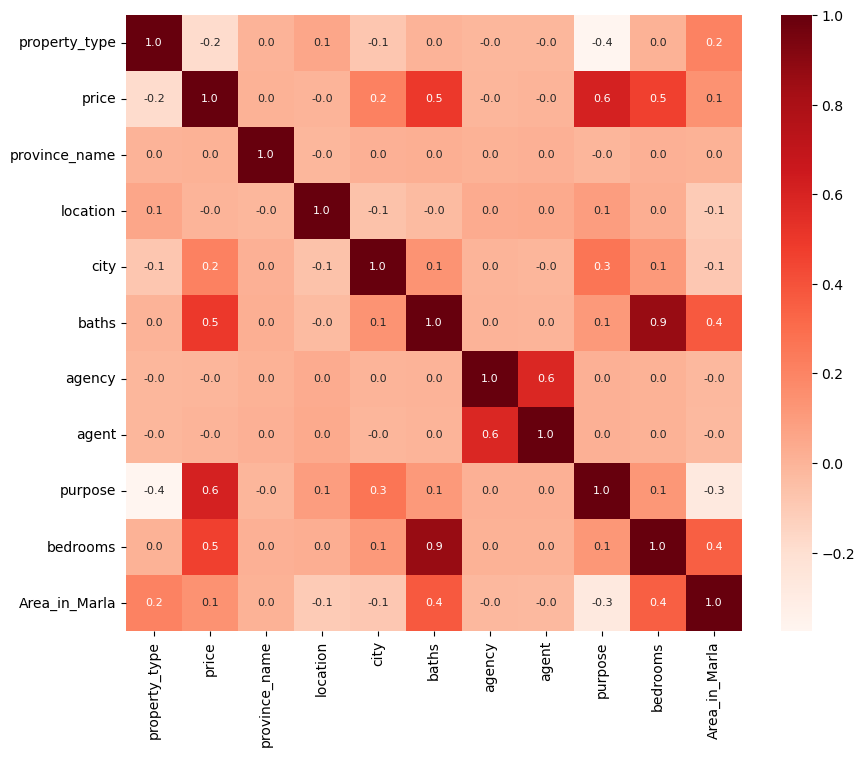

In [9]:
df_Corr=df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df_Corr, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':8}, cmap='Reds')

In [10]:
df = df.drop(['province_name','agency','agent'], axis=1)

<Axes: >

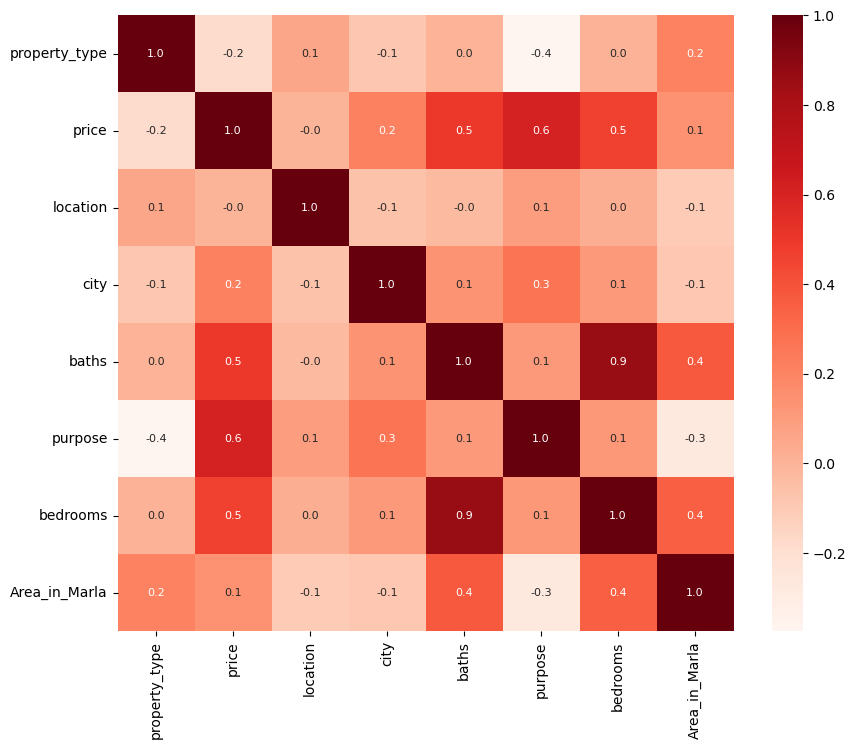

In [11]:
df_Corr=df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df_Corr, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':8}, cmap='Reds')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  int64  
 1   price          99499 non-null  float64
 2   location       99499 non-null  int64  
 3   city           99499 non-null  int64  
 4   baths          99499 non-null  float64
 5   purpose        99499 non-null  int64  
 6   bedrooms       99499 non-null  float64
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 6.8 MB


## <h2 style="text-align: center; color:green;">Centralization<h2>

In [13]:
X = df.drop(['price'], axis=1)
Y = df['price']
X.head()

,property_type,location,city,baths,purpose,bedrooms,Area_in_Marla
0,1,452,1,2.0,1,2.0,4.0
1,1,382,1,3.0,1,3.0,5.6
2,2,457,1,6.0,1,5.0,8.0
3,2,198,1,4.0,1,4.0,40.0
4,2,327,1,3.0,1,3.0,8.0


## <h2 style="text-align: center; color:green;">Standardize<h2>

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:1]

array([[-0.87253   , -0.19680575, -1.23400772, -1.03791608,  0.63438258,
        -1.07550747, -0.63718226]])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  int64  
 1   price          99499 non-null  float64
 2   location       99499 non-null  int64  
 3   city           99499 non-null  int64  
 4   baths          99499 non-null  float64
 5   purpose        99499 non-null  int64  
 6   bedrooms       99499 non-null  float64
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 6.8 MB


## <h2 style="text-align: center; color:green;">Principal Component Analysis (PCA)<h2>

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
X_pca=pca.fit_transform(X_scaled)
X_pca.shape

(99499, 7)

## <h2 style="text-align: center; color:green;">Data Splitting<h2>

In [17]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X_pca,Y, test_size = 0.2, random_state=20)

In [18]:
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  79599
Size of Train Y =  79599
Size of Test X =  19900
Size of Test Y =  19900


# <h1 style="text-align: center; color:Blue;"><b>Regression Models</b><h1>

## <h2 style="text-align: center; color:red;">Linear Regression<h2>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
from sklearn.linear_model import LinearRegression
Code_Buddies= LinearRegression()
Code_Buddies.fit(X_TRAIN, Y_TRAIN)
LinearRegression()

LinearRegression()

### <h3 style="text-align: center; color:Green;">Finding Traning Accuracy<h3>

In [21]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[12235500.50497051 11857136.58275489 21688168.26651732 ...
  8489207.86438774 -3180454.16680889 17957179.85679861]


In [22]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.5888736310518213
Mean Absolute Error :  5142362.923374418


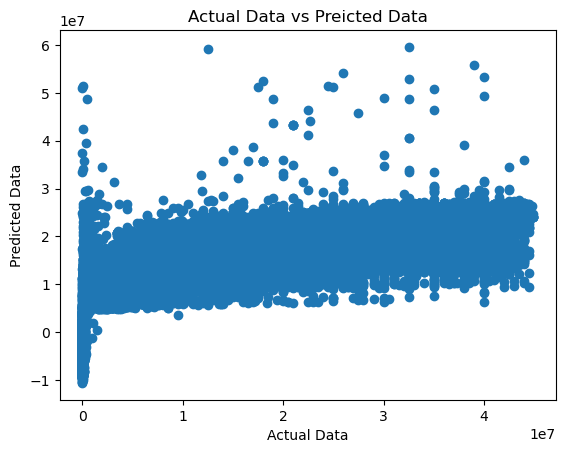

In [23]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual Data vs Preicted Data")
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [24]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [25]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.5863721768154326
Mean Absolute Error :  5186148.41292442


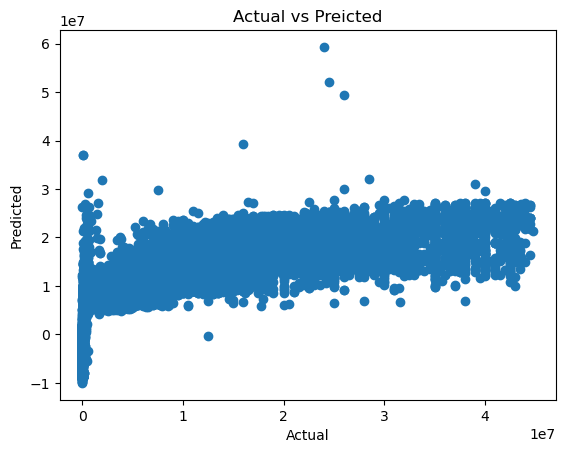

In [26]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

## <h2 style="text-align: center; color:red;">Support Vector Machine<h2>

In [27]:
from sklearn.svm import SVR
Code_Buddies = SVR(kernel='linear')
Code_Buddies.fit(X_TRAIN, Y_TRAIN)
SVR(kernel='linear')

SVR(kernel='linear')

### <h3 style="text-align: center; color:Green;">Finding Traning Accuracy<h3>

In [28]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[7504348.13838143 7584583.94168729 7678040.88577795 ... 7501133.23413814
 7412138.07418455 7670551.27555333]


In [29]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  -0.05831110883479318
Mean Absolute Error :  8169467.20355497


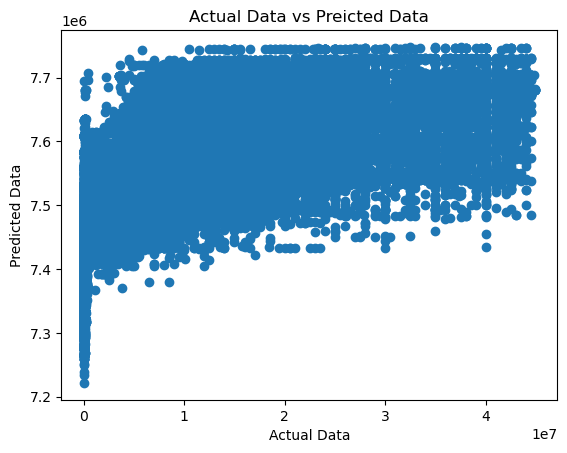

In [30]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual Data vs Preicted Data")
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [31]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [32]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  -0.05788666408253884
Mean Absolute Error :  8178115.951730704


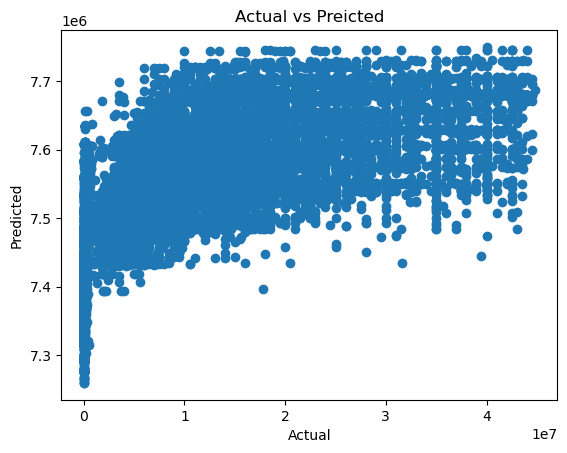

In [33]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

## <h2 style="text-align: center; color:red;">Decision Tree<h2>

In [34]:
from sklearn.tree import DecisionTreeRegressor 
Code_Buddies = DecisionTreeRegressor(random_state = 20) 
Code_Buddies.fit(X_TRAIN, Y_TRAIN) 
DecisionTreeRegressor(random_state=20)

DecisionTreeRegressor(random_state=20)

### <h3 style="text-align: center; color:Green;">Finding Training Accuracy<h3>

In [35]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[11181818.18181818   109000.         19866033.75527426 ...
  5214285.71428571    39416.66666667 11610000.        ]


In [36]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.9625286765130783
Mean Absolute Error :  970304.6110754352


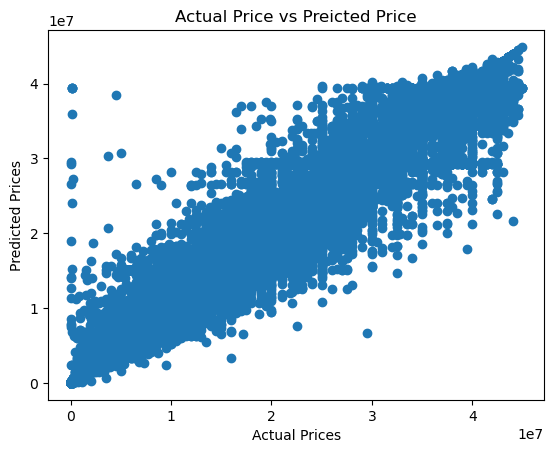

In [37]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [38]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [39]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.8682338807489155
Mean Absolute Error :  1900396.8335663225


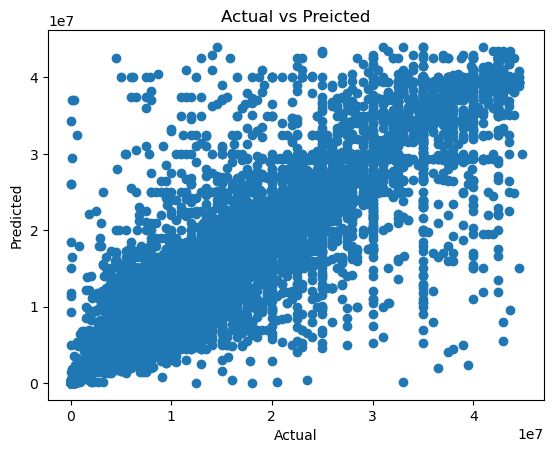

In [40]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

## <h2 style="text-align: center; color:REd;">Random Forest<h2>

In [41]:
from sklearn.ensemble import RandomForestRegressor
Code_Buddies = RandomForestRegressor(n_estimators=20, random_state=20)
Code_Buddies.fit(X_TRAIN, Y_TRAIN) 
RandomForestRegressor(n_estimators=20, random_state=20)

RandomForestRegressor(n_estimators=20, random_state=20)

### <h3 style="text-align: center; color:Green;">Finding Training Accuracy<h3>

In [42]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[11308388.27838828   109823.57691145 19847496.61446858 ...
  5139822.87851038    39088.07730668 11521757.21178818]


In [43]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.9540381214994945
Mean Absolute Error :  1235809.4074765411


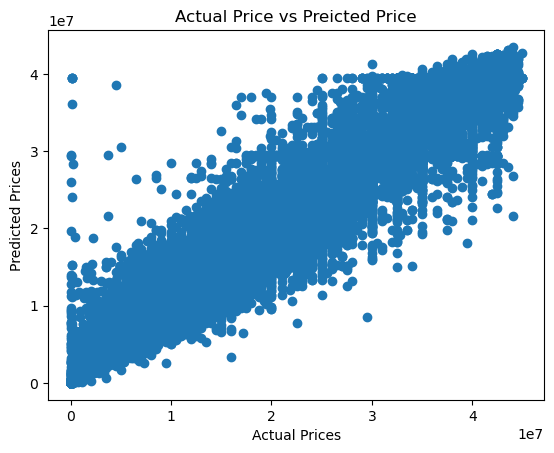

In [44]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [45]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [46]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.9044529232832681
Mean Absolute Error :  1743682.8604496808


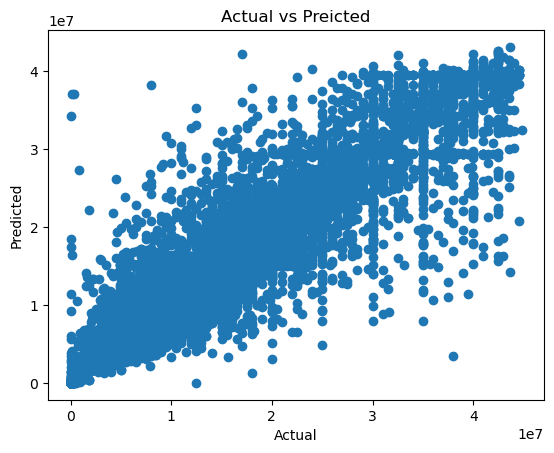

In [47]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# <h1 style="text-align: center; color:Red;">ANN<h1>

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
model = Sequential([
    Input(shape=(X_TRAIN.shape[1],)),  # Explicit Input layer
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='linear')  # Output layer for regression
])
model.compile(optimizer='adam',
              loss='mean_squared_error',  
              metrics=['mae'])
history = model.fit(X_TRAIN, Y_TRAIN, epochs=60, batch_size=32, validation_split=0.2)
train_loss, train_mae = model.evaluate(X_TRAIN, Y_TRAIN)
print(f"Train Loss (MSE): {train_loss:.4f}")
print(f"Train MAE: {train_mae:.4f}")
train_pred=model.predict(X_TRAIN)
test_loss, test_mae = model.evaluate(X_TEST, Y_TEST)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Epoch 1/60
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 223020488589312.0000 - mae: 10432100.0000 - val_loss: 217626647199744.0000 - val_mae: 10262997.0000
Epoch 2/60
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 217623610523648.0000 - mae: 10263318.0000 - val_loss: 203711607472128.0000 - val_mae: 9879461.0000
Epoch 3/60
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 197509641142272.0000 - mae: 9701125.0000 - val_loss: 177472008093696.0000 - val_mae: 9128113.0000
Epoch 4/60
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 169316368515072.0000 - mae: 8897582.0000 - val_loss: 141641193095168.0000 - val_mae: 7980254.5000
Epoch 5/60
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 131539077693440.0000 - mae: 7661022.5000 - val_loss: 101896723365888.0000 - val_mae: 6483813.0000
Epoch 6/60
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 92891426848768.0000 - mae: 6114769.0000 - val_loss: 67007160516608.0000 - val_mae: 4973580.0000
Epoch 7/60
1990/1990 ━━━━━━━━━━━━━━━

Linear Regression: Moderate performance with R² ~0.59 and MAE ~5.14 million.

SVM: Poor results with negative R² and high MAE (~8.17 million).

Decision Tree: Excellent training performance (R² = 0.96) but overfitting (R² = 0.87, MAE ~1.90 million).
                                                                           
Random Forest: Best overall, with strong generalization (R² = 0.95, MAE ~1.74 million).
                                                         
ANN: High loss and MAE (~3.58 million), indicating poor learning.
    
<b>Overall Conclusion:</b>
Random Forest is the best model, offering the best balance of performance and generalization, while SVM and ANN need improvement.